# PSF Model - Gaussian Fit Check 
- Eden McEwen
- 2022_04_28

**Question Posed:** How good are our moffat fits for a given night? We can answer this with an example star, or an average fit. 

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import sys
from imaka.analysis import psf_models as mod
from astropy.table import Table, Column
import numpy as np

In [3]:
# 4F nights
from imaka.reduce.nights import reduce_2021_08_27 as redu_0827
from imaka.reduce.nights import reduce_2021_08_29 as redu_0829

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


## Example: Testing on one set of points 

Testing out the model on one set of points

In [4]:
o_f_stats = redu_0827.stacks_dir + "fld2_stack__o_RIVB_stars_stats.fits"
o_f_stats = Table.read(o_f_stats)
o_f_stats = o_f_stats[o_f_stats['peak'] > 1000]
o_f_stats = o_f_stats[np.abs(o_f_stats['xcentroid'] - 5680) < 5000]
o_f_stats = o_f_stats[np.abs(o_f_stats['ycentroid'] - 5680) < 5000]
o_f_stats

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag,x_fwhm,y_fwhm,theta,ee25_rad,ee50_rad,ee80_rad,nea2,nea,fwhm_emp
int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
378,7538.462,723.164,0.44,0.12,-0.57,361,0.0,2358.4,236.339284,-5.93,15.99,16.01,3348198.142,1.0,0.0,0.0,750.7766337759663,855.6866119227661,15.284436256140024
390,5578.784,745.843,0.45,0.09,-0.56,361,0.0,1230.0,123.538684,-5.23,20.57,12.27,3441636.73,1.0,0.0,0.0,737.4508080430261,841.0151627910732,14.973043078712072
393,9465.606,754.716,0.43,0.17,-0.53,361,0.0,2837.5,284.378319,-6.13,15.13,15.87,3511190.657,1.0,0.0,0.0,769.1507674890456,873.256259672619,15.410536651395454
500,1186.57,917.233,0.42,0.08,-0.57,361,0.0,5969.1,576.44123,-6.9,18.87,15.4,2114882.791,1.05,0.0,0.0,847.0644796673155,955.5608144954263,16.34242108451645
510,1973.993,927.086,0.4,0.05,-0.58,361,0.0,1324.2,129.23386,-5.28,16.59,17.28,3503405.435,1.1,0.0,0.0,862.6390200680066,973.5277532207277,16.59139504597917
571,6032.596,992.088,0.42,0.08,-0.59,361,0.0,1186.0,122.097074,-5.22,17.65,13.97,3850157.1,1.0,0.0,0.0,756.9701080834623,856.2544027507299,15.40557857201846
755,5665.391,1266.309,0.43,0.08,-0.58,361,0.0,2771.5,280.082813,-6.12,18.38,13.91,3961111.589,1.0,0.0,0.0,767.5806617381676,873.3117633663124,15.342637551302477
862,2608.547,1448.384,0.42,0.07,-0.59,361,0.0,3970.6,386.102787,-6.47,15.36,18.4,-4469991.381,1.05,0.0,0.0,834.2502089459014,942.916885374118,16.203147661006813
863,6548.009,1448.443,0.43,0.09,-0.57,361,0.0,1566.1,157.638657,-5.49,13.83,18.57,2219719.109,1.0,0.0,0.0,757.9404843081395,862.4765249982381,15.428702644217562


In [5]:
c_f = redu_0827.stacks_dir + "fld2_stack_LS_c_RIVB_stars_stats.fits"
c_f_stats = Table.read(c_f)
c_f_stats = c_f_stats[c_f_stats['peak'] > 1000]
c_f_stats = c_f_stats[np.abs(c_f_stats['xcentroid'] - 5680) < 5000]
c_f_stats = c_f_stats[np.abs(c_f_stats['ycentroid'] - 5680) < 5000]
c_f_stats

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag,x_fwhm,y_fwhm,theta,ee25_rad,ee50_rad,ee80_rad,nea2,nea,fwhm_emp
int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
471,7532.906,721.66,0.45,0.26,-0.23,121,0.0,5404.9,226.801523,-5.89,9.19,10.72,-7965688.459,0.8,0.0,0.0,391.6161961524416,468.80264945629006,8.96475766898824
491,5573.059,744.253,0.46,0.13,-0.21,121,0.0,2904.6,124.805949,-5.24,10.48,9.44,-5781736.679,0.8,0.0,0.0,380.6530059295709,458.3063382944693,8.611240972436892
494,9459.872,753.237,0.44,0.36,-0.14,121,0.0,6316.4,258.242419,-6.03,9.37,11.17,-5400643.628,0.8,0.0,0.0,406.9018896784527,484.1944015749791,9.383882294332333
540,2810.834,825.134,0.44,0.13,-0.33,121,0.0,1510.5,57.152962,-4.39,11.86,9.9,-4260819.212,0.9000000000000001,0.0,0.0,477.0647213374977,564.0941884766637,9.9757908366455
618,1180.506,915.656,0.42,0.16,-0.31,121,0.0,12025.0,442.839478,-6.62,10.59,12.58,-5239631.299,0.9000000000000001,0.0,0.0,490.2491328018543,573.1786754902284,10.503022143928598
623,1967.945,925.505,0.41,0.06,-0.36,121,0.0,2657.9,95.81715,-4.95,12.11,11.23,-4706463.957,0.9000000000000001,0.0,0.0,499.87368570454015,584.1574834896329,10.690462175950497
700,6026.9,990.506,0.45,0.12,-0.22,121,0.0,2841.2,122.469958,-5.22,10.65,9.43,-6191067.343,0.8,0.0,0.0,389.4143236644649,460.41651349028086,8.783980670000979
709,6708.954,997.674,0.46,0.19,-0.23,121,0.0,1007.0,42.434512,-4.07,9.13,11.07,-5734743.051,0.7500000000000001,0.0,0.0,356.082870925924,430.5880458492699,8.870524441352554
897,5659.738,1264.715,0.45,0.14,-0.24,121,0.0,6540.6,279.02058,-6.11,8.44,12.03,-8478113.794,0.8,0.0,0.0,391.95348461885163,469.9511380339529,8.798463747717433


 points chosen:
        - open : 1625.98	10426.2	
        - closed : 1620.375	10424.396

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Bitstream Vera Sans
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Bitstream Vera Sans


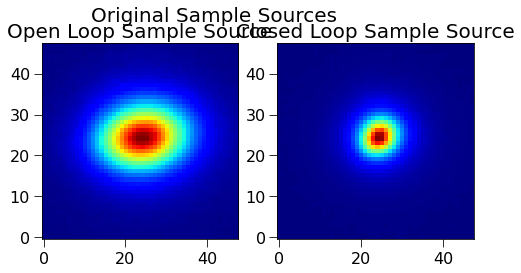

In [6]:
open_file = redu_0827.stacks_dir + "fld2_stack__o_RIVB.fits"
closed_file = redu_0827.stacks_dir + "fld2_stack_LS_c_RIVB.fits"
open_cut, closed_cut = mod.plot_samples(open_file,1625.98, 10426.2, closed_file, 1620.375, 10424.396, 48)

### Single Elliptical Gaussian

Residuals Squared Summed               -  Open Loop :  2.28e-06
Fraction of Variance Unexplained (FVU) -  Open Loop :  6.78e-03
Median Fractional Residual Per Pix     -  Open Loop :  4.28e-02

Fit Info:
nfev =  65
ierr =  1
mesg =  Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000

Params:
amplitude_0     =   0.003126 flux 
x_mean_0        =  24.102425 pix  
y_mean_0        =  24.338836 pix  
x_stddev_0      =   7.429430 pix  
y_stddev_0      =   5.538397 pix  
theta_0         =   8.067324 deg  
amplitude_1     =   0.000084 flux 


Residuals Squared Summed               -  Closed Loop :  3.43e-05
Fraction of Variance Unexplained (FVU) -  Closed Loop :  4.75e-02
Median Fractional Residual Per Pix     -  Closed Loop :  1.26e-01

Fit Info:
nfev =  89
ierr =  1
mesg =  Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000

Params:
amplitude_0     =   0.008338 flux 
x_mean_0        =  24.441048 pix  
y_mean_0     

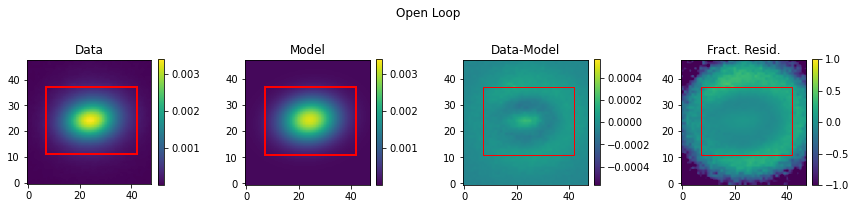

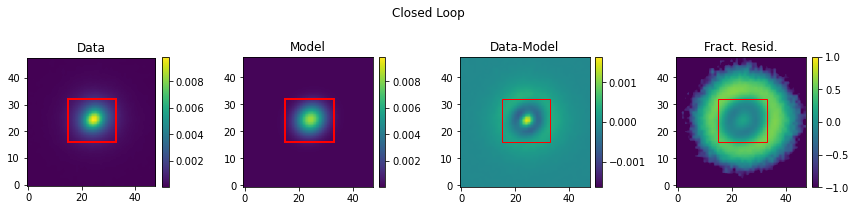

In [79]:
open_fit = mod.model_plot("Gaussian", open_cut, 1, title="Open Loop")
closed_fit = mod.model_plot("Gaussian", closed_cut, 1, fignumber=2, title="Closed Loop")

### Single Elliptical Moffat

Residuals Squared Summed               -  Open Loop :  7.36e-07
Fraction of Variance Unexplained (FVU) -  Open Loop :  1.66e-03
Median Fractional Residual Per Pix     -  Open Loop :  2.64e-02
beta:  3.822398299637626

Fit Info:
nfev =  73
ierr =  1
mesg =  Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000

Params:
amplitude_0     =   0.003347 flux 
phi_0           =   0.139626 deg  
power_0         =   3.822398 pix  
x_0_0           =  24.098111 pix  
y_0_0           =  24.334337 pix  
width_x_0       =  18.518626 pix  
width_y_0       =  13.833023 pix  
amplitude_1     =   0.000032 flux 


Residuals Squared Summed               -  Closed Loop :  1.25e-06
Fraction of Variance Unexplained (FVU) -  Closed Loop :  6.78e-03
Median Fractional Residual Per Pix     -  Closed Loop :  1.86e-02
beta:  1.6617382100080373

Fit Info:
nfev =  82
ierr =  1
mesg =  Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000

Param

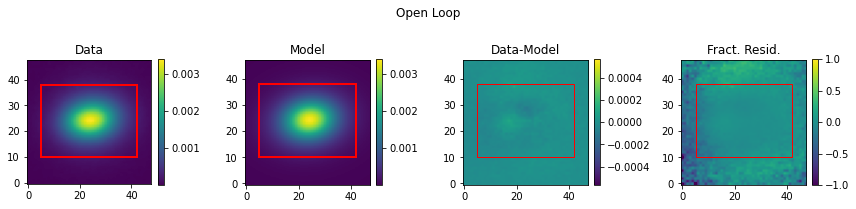

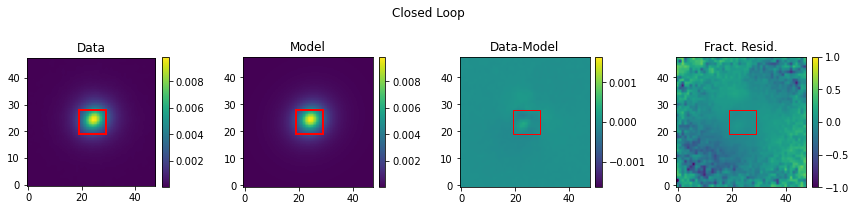

In [78]:
open_fit = mod.model_plot("Moffat", open_cut, 1, x_wid=4, y_wid=6, title="Open Loop")
closed_fit = mod.model_plot("Moffat", closed_cut, 1, x_wid=3, y_wid=3, fignumber=2, title="Closed Loop")

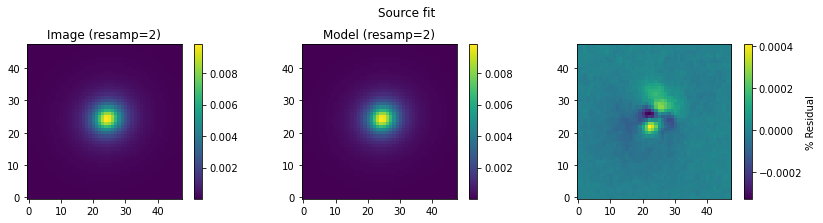

In [49]:
closed_fit = mod.model_plot_double_test("Moffat", closed_cut, 1, x_wid_0=3, y_wid_0=3, fignumber=2, title="Closed Loop")